Exercício 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv('dataset_seguro.csv')
df

Saving dataset_seguro.csv to dataset_seguro (2).csv


,Idade,Renda_Anual,Valor_Carro,Anos_Habilitacao,Sinistros,Tipo_Combustivel,Regiao,Aceitou_Oferta
0,56,43093,23709,37,0,Gasolina,Norte,0
1,69,86105,143961,5,3,Elétrico,Oeste,0
2,46,123746,50355,19,4,Diesel,Sul,0
3,32,120199,164188,14,0,Elétrico,Sul,1
4,60,71885,176542,26,0,Gasolina,Sul,1
...,...,...,...,...,...,...,...,...
395,20,64482,78596,39,4,Diesel,Norte,0
396,35,106188,141101,29,4,Gasolina,Norte,0
397,42,24748,181595,29,4,Gasolina,Oeste,0
398,59,106769,108861,16,0,Gasolina,Leste,1


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

#encoded_features = encoder.fit_transform(df[['Tipo_Combustivel', 'Regiao']])
encoded_fuel = encoder.fit_transform(df[['Tipo_Combustivel']])
encoded_region = encoder.fit_transform(df[['Regiao']])

df['Tipo_Combustivel_encoded'] = encoded_fuel
df['Regiao_encoded'] = encoded_region
columns_to_drop = ['Tipo_Combustivel', 'Regiao']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
display(df.head())

KeyError: "None of [Index(['Tipo_Combustivel'], dtype='object')] are in the [columns]"

In [ ]:
X = df.drop('Aceitou_Oferta', axis=1)
y = df['Aceitou_Oferta']
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
display(X.head())
display(y.head())

Features (X) shape: (400, 7)
Target (y) shape: (400,)


,Idade,Renda_Anual,Valor_Carro,Anos_Habilitacao,Sinistros,Tipo_Combustivel_encoded,Regiao_encoded
0,56,43093,23709,37,0,2.0,1.0
1,69,86105,143961,5,3,1.0,2.0
2,46,123746,50355,19,4,0.0,3.0
3,32,120199,164188,14,0,1.0,3.0
4,60,71885,176542,26,0,2.0,3.0


,Aceitou_Oferta
0,0
1,0
2,0
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 7)
X_test shape: (80, 7)
y_train shape: (320,)
y_test shape: (80,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia do modelo: 1.0000

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        13

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Matriz de Confusão:
 [[67  0]
 [ 0 13]]


Importância das Features:


,Feature,Importance
4,Sinistros,0.280422
1,Renda_Anual,0.233003
5,Tipo_Combustivel_encoded,0.191597
2,Valor_Carro,0.162033
0,Idade,0.056975
3,Anos_Habilitacao,0.055048
6,Regiao_encoded,0.020923


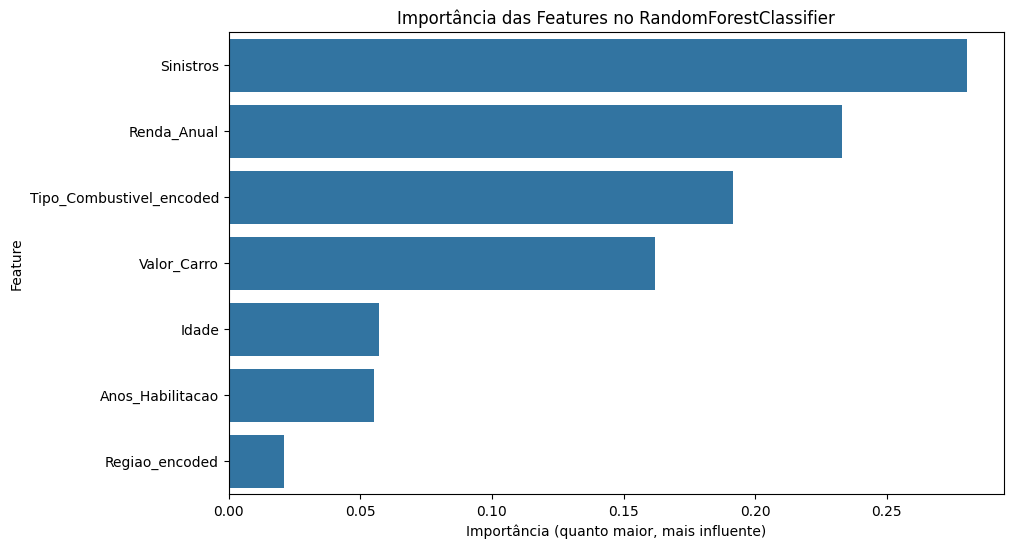

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


feature_importances = model.feature_importances_

# Obter os nomes das features do DataFrame original X
features = X.columns

# Criar um DataFrame para melhor visualização
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Classificar as features por importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as importâncias das features
print("Importância das Features:")
display(importance_df)

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das Features no RandomForestClassifier')
plt.xlabel('Importância (quanto maior, mais influente)')
plt.ylabel('Feature')
plt.show()

Exercicio 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv('dataset_consumo_energia.csv')
df

Saving dataset_consumo_energia.csv to dataset_consumo_energia.csv


,Area_m2,Moradores,Idade_Construcao,Aparelhos,Temp_Media,Regiao,Isolamento,Consumo_kWh
0,152,6,47,29,23.696547,Oeste,3,812.736097
1,229,2,21,17,19.928041,Oeste,2,788.127933
2,142,2,16,14,31.382046,Norte,5,596.855808
3,64,6,21,29,30.988318,Leste,1,717.950194
4,156,3,11,22,28.893929,Leste,1,1118.053476
...,...,...,...,...,...,...,...,...
395,148,2,5,21,34.388246,Oeste,1,794.849642
396,202,4,19,5,20.162669,Leste,2,1034.635063
397,142,5,14,29,28.134733,Leste,5,1093.989429
398,195,5,26,15,21.503801,Norte,1,832.028382


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoded_region = encoder.fit_transform(df[['Regiao']])

df['Regiao_encoded'] = encoded_region
columns_to_drop = ['Regiao']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
display(df.head())

,Area_m2,Moradores,Idade_Construcao,Aparelhos,Temp_Media,Isolamento,Consumo_kWh,Regiao_encoded
0,152,6,47,29,23.696547,3,812.736097,2.0
1,229,2,21,17,19.928041,2,788.127933,2.0
2,142,2,16,14,31.382046,5,596.855808,1.0
3,64,6,21,29,30.988318,1,717.950194,0.0
4,156,3,11,22,28.893929,1,1118.053476,0.0


In [ ]:
X = df.drop('Consumo_kWh', axis=1)
y = df['Consumo_kWh']
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
display(X.head())
display(y.head())

Features (X) shape: (400, 7)
Target (y) shape: (400,)


,Area_m2,Moradores,Idade_Construcao,Aparelhos,Temp_Media,Isolamento,Regiao_encoded
0,152,6,47,29,23.696547,3,2.0
1,229,2,21,17,19.928041,2,2.0
2,142,2,16,14,31.382046,5,1.0
3,64,6,21,29,30.988318,1,0.0
4,156,3,11,22,28.893929,1,0.0


,Consumo_kWh
0,812.736097
1,788.127933
2,596.855808
3,717.950194
4,1118.053476


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 7)
X_test shape: (80, 7)
y_train shape: (320,)
y_test shape: (80,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
import pandas as pd

predictions_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
display(predictions_df.head())

,Real,Previsto
209,798.434137,876.338907
280,967.467885,649.193247
33,702.484055,707.223709
210,546.882003,539.606149
93,432.173112,587.718831


Importância das Features (RandomForestRegressor):


,Feature,Importance
0,Area_m2,0.411348
3,Aparelhos,0.184569
4,Temp_Media,0.117696
1,Moradores,0.109310
2,Idade_Construcao,0.095133
5,Isolamento,0.050198
6,Regiao_encoded,0.031744


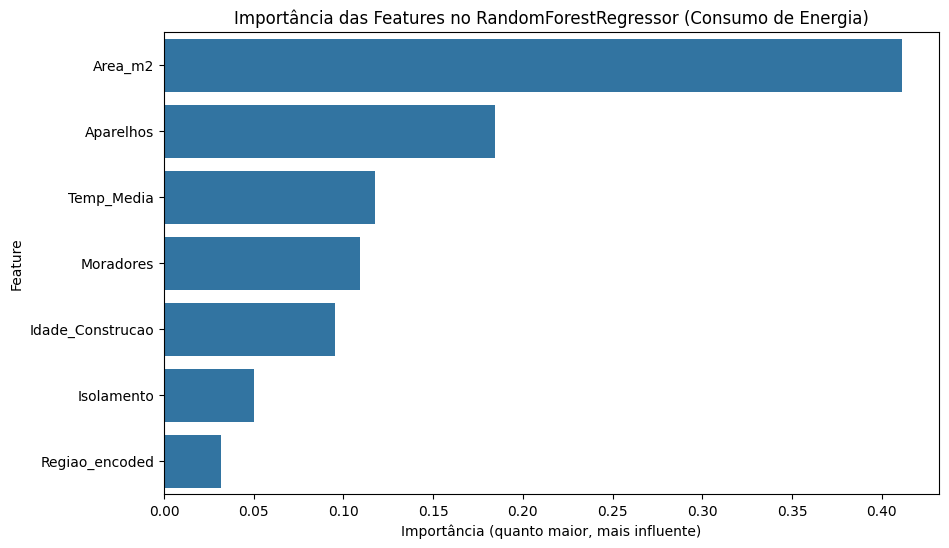

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_reg = model.feature_importances_

features_reg = X.columns

importance_df_reg = pd.DataFrame({
    'Feature': features_reg,
    'Importance': feature_importances_reg
})

importance_df_reg = importance_df_reg.sort_values(by='Importance', ascending=False)

print("Importância das Features (RandomForestRegressor):")
display(importance_df_reg)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_reg)
plt.title('Importância das Features no RandomForestRegressor (Consumo de Energia)')
plt.xlabel('Importância (quanto maior, mais influente)')
plt.ylabel('Feature')
plt.show()